<a href="https://colab.research.google.com/github/kchenn7/HumanDetection/blob/main/HumanDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ultralytics

In [ ]:
%cd {Home}
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="93NZxKB666V1JkaykKXr")
project = rf.workspace("kchenn7").project("human-detection-rvdyi")
version = project.version(1)

dataset = version.download("yolov8")

[Errno 2] No such file or directory: '{Home}'
/content
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.42, to fix: `pip install ultralytics==8.0.196`


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=2 imgsz=640

[Errno 2] No such file or directory: '{Home}'
/content
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Human-Detection-1/data.yaml, epochs=2, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

In [ ]:
!yolo task=detect \
mode=val \
model={HOME}/content/yolov8n.pt \
data=/content/Human-Detection-1/data.yaml

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /content/Human-Detection-1/valid/labels.cache... 1683 images, 1293 backgrounds, 0 corrupt: 100% 1683/1683 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 106/106 [00:19<00:00,  5.35it/s]
                   all       1683        678     0.0136       0.27    0.00931    0.00365
                person       1683        678     0.0136       0.27    0.00931    0.00365
Speed: 0.5ms preprocess, 4.5ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val5
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect \
mode=predict \
model=/content/yolov8n.pt \
conf=0.25 \
source=/content/pedestrian3.jpg

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/pedestrian3.jpg: 480x640 2 persons, 178.3ms
Speed: 13.7ms preprocess, 178.3ms inference, 885.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


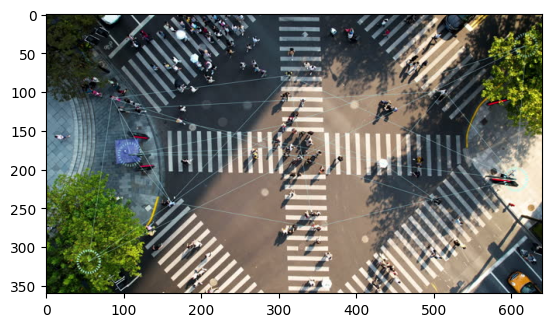

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read the image file
img = mpimg.imread('/content/pedestrian2.jpg')  # replace with your image path

# Display the image
plt.imshow(img)
plt.show()

In [ ]:
from ultralytics import YOLO

# Load a YOLO model
model = YOLO('yolov8n.pt')  # replace with your model

# Access the model's configuration

# Print the configuration
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s